In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
years = 20

endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=365*years)

In [3]:
tickers = ['SPY', 'BND', 'GLD', 'QQQ', 'VTI']

In [6]:
adj_close_df = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker, start=startDate, end=endDate, auto_adjust=False)
    adj_close_df[ticker] = data['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
log_returns = np.log(adj_close_df / adj_close_df.shift(1))
log_returns = log_returns.dropna()

In [11]:
def expected_returns(weights, log_returns):
    return np.sum(log_returns.mean()*weights)

In [12]:
def standard_deviation(weights, cov_matrix):
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)
cov_matrix = log_returns.cov()

In [13]:
portfolio_value = 100000
weights = np.array([1/len(tickers)]*len(tickers))

In [15]:
portfolio_expected_returns = expected_returns(weights, log_returns)
portfolio_std_dev = standard_deviation(weights, cov_matrix)

In [16]:
def random_z_score():
    return np.random.normal(0,1)

In [24]:
days = 252
def scenario_gain_loss(portfolio_value, portfolio_std_dev, z_score, days):
    return portfolio_value*portfolio_expected_returns*days + portfolio_value*portfolio_std_dev*z_score*np.sqrt(days)

In [25]:
simulation = 10000
scenario_return = []

for i in range(simulation):
    z_score = random_z_score()
    scenario_return.append(scenario_gain_loss(portfolio_value, portfolio_std_dev, z_score, days))

In [29]:
confidence_interval = 0.95
VaR = -np.percentile(scenario_return, 100 - (confidence_interval * 100))
print(VaR)

12401.7861303051


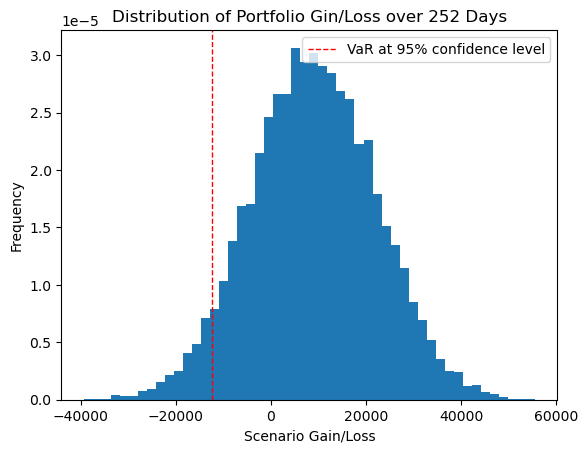

In [30]:
plt.hist(scenario_return, bins=50, density=True)
plt.xlabel('Scenario Gain/Loss')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio Gin/Loss over {days} Days')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=1, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()